In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

%matplotlib notebook
# import matplotlib
# # matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
experts = pd.read_csv("/Users/fortjay81/Dropbox/Uvic/dissertation/gh-vr/analysis/expertrankedmetrics.csv", index_col=0)
non = pd.read_csv("/Users/fortjay81/Dropbox/Uvic/dissertation/gh-vr/analysis/nonexpertrankedmetrics.csv", index_col=0)

In [3]:
experts["label"] = pd.Series(np.ones(len(experts)), index=experts.index)
non["label"] = pd.Series(np.zeros(len(non)), index=non.index)

all_data = pd.concat([experts, non])

In [4]:
X = all_data.values[:, :-1]
y = all_data.values[:, -1:]

X_scaled = StandardScaler().fit_transform(X)

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [13]:
pca.n_components_

2

<IPython.core.display.Javascript object>


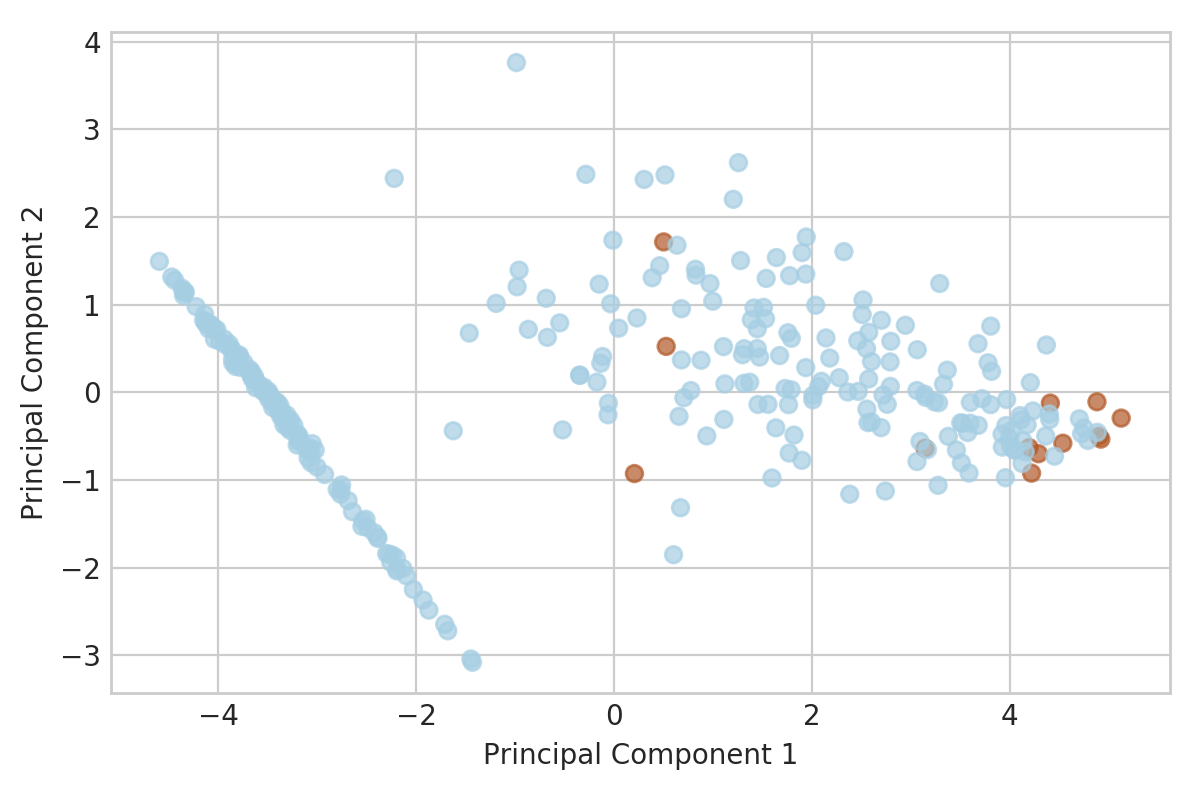

In [15]:
with plt.style.context('seaborn-whitegrid'):
    
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired, alpha=.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y = y.squeeze()
lda = LinearDiscriminantAnalysis(n_components=3)
X_r2 = lda.fit_transform(X, y)

In [ ]:
X_r2.shape

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    
    ax.plot(X_r2)
    plt.tight_layout()